In [92]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import tensorflow as tf

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from sklearn.model_selection import train_test_split

In [93]:
Dataset_path=os.listdir('C:/Users/user/Downloads/Traffic_Sign_Data')
print(Dataset_path)

['Meta', 'Meta.csv', 'Test', 'Test.csv', 'Train', 'Train.csv']


In [94]:
Traffic_train=pd.read_csv(r'C:\Users\user\Downloads\Traffic_Sign_Data\Train.csv')
Traffic_train.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


In [95]:
Traffic_test=pd.read_csv(r'C:\Users\user\Downloads\Traffic_Sign_Data\Test.csv')
Traffic_test.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [96]:
Traffic_meta=pd.read_csv(r'C:\Users\user\Downloads\Traffic_Sign_Data\Meta.csv')
Traffic_meta.head()

,Path,ClassId,ShapeId,ColorId,SignId
0,Meta/27.png,27,0,0,1.32
1,Meta/0.png,0,1,0,3.29
2,Meta/1.png,1,1,0,3.29
3,Meta/10.png,10,1,0,3.27
4,Meta/11.png,11,0,0,1.22


In [97]:
Traffic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39209 entries, 0 to 39208
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Width    39209 non-null  int64 
 1   Height   39209 non-null  int64 
 2   Roi.X1   39209 non-null  int64 
 3   Roi.Y1   39209 non-null  int64 
 4   Roi.X2   39209 non-null  int64 
 5   Roi.Y2   39209 non-null  int64 
 6   ClassId  39209 non-null  int64 
 7   Path     39209 non-null  object
dtypes: int64(7), object(1)
memory usage: 2.4+ MB


In [98]:
Traffic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12630 entries, 0 to 12629
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Width    12630 non-null  int64 
 1   Height   12630 non-null  int64 
 2   Roi.X1   12630 non-null  int64 
 3   Roi.Y1   12630 non-null  int64 
 4   Roi.X2   12630 non-null  int64 
 5   Roi.Y2   12630 non-null  int64 
 6   ClassId  12630 non-null  int64 
 7   Path     12630 non-null  object
dtypes: int64(7), object(1)
memory usage: 789.5+ KB


In [99]:
Traffic_train.shape

(39209, 8)

In [100]:
Traffic_test.shape

(12630, 8)

In [101]:
Traffic_train.isnull().sum()

Width      0
Height     0
Roi.X1     0
Roi.Y1     0
Roi.X2     0
Roi.Y2     0
ClassId    0
Path       0
dtype: int64

In [102]:
Traffic_test.isnull().sum()

Width      0
Height     0
Roi.X1     0
Roi.Y1     0
Roi.X2     0
Roi.Y2     0
ClassId    0
Path       0
dtype: int64

In [103]:
len(Traffic_train['ClassId'].value_counts())

43

In [104]:
Traffic_train['ClassId']=Traffic_train['ClassId'].astype(str)

In [105]:
Traffic_train=Traffic_train[['ClassId','Path']]
Traffic_train.head()

,ClassId,Path
0,20,Train/20/00020_00000_00000.png
1,20,Train/20/00020_00000_00001.png
2,20,Train/20/00020_00000_00002.png
3,20,Train/20/00020_00000_00003.png
4,20,Train/20/00020_00000_00004.png


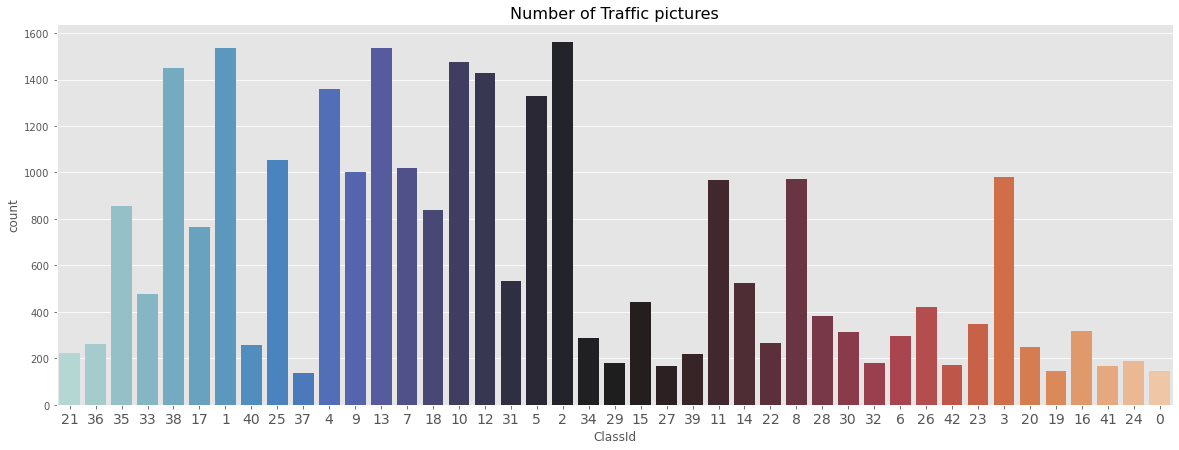

In [387]:
#Data visulisation
import seaborn as sns
plt.style.use("ggplot")
plt.figure(figsize =(20,7))
sns.countplot(x=Traffic_train['ClassId'],data =Traffic_train,palette="icefire")
plt.title("Number of Traffic pictures", fontsize = 16)
plt.xticks(fontsize = 14)
plt.show()

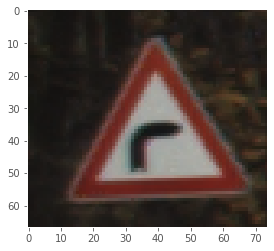

In [381]:
img1 = Image.open('C:/Users/user/Downloads/Traffic_Sign_Data/' + Traffic_train['Path'][179])
plt.imshow(img1)
plt.grid()

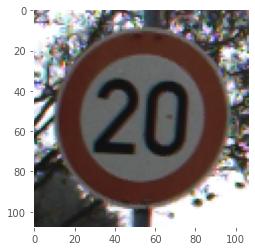

In [298]:
img2 = Image.open('C:/Users/user/Downloads/Traffic_Sign_Data/' + Traffic_train['Path'][448])
plt.imshow(img2)
plt.grid()

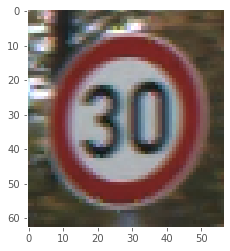

In [330]:
img3 = Image.open('C:/Users/user/Downloads/Traffic_Sign_Data/' + Traffic_train['Path'][2227])
plt.imshow(img3)
plt.grid()

In [107]:
Traffic_Y_train=Traffic_train['ClassId'].values
Traffic_Y_test=Traffic_test['ClassId'].values

Traffic_X_train=Traffic_train.drop(["ClassId"],axis=1).values
Traffic_X_test=Traffic_train.drop(["ClassId"],axis=1).values

print("Traffic X train values",Traffic_X_train.shape)
print("Traffic X test values",Traffic_X_test.shape)

print("Y train labels",Traffic_Y_train.shape)
print("Y test  labels",Traffic_Y_test.shape)


Traffic X train values (39209, 1)
Traffic X test values (39209, 1)
Y train labels (39209,)
Y test  labels (12630,)


In [108]:
Traffic_train = Traffic_train.reset_index(drop=True)
Validation_Data = Validation_Data.reset_index(drop=True)
batch_size=30

In [109]:
Total_train=Traffic_train.shape[0]
Total_Validation=Validation_Data.shape[0]
print(Total_train,Total_Validation)

39209 11763


In [110]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
Traffic_train_datagen=ImageDataGenerator(rotation_range=15,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             rescale=1.0/255,
                             horizontal_flip=True)

Traffic_train_generator=Traffic_train_datagen.flow_from_dataframe(Traffic_train,
                                              '/Users/user/Downloads/Traffic_Sign_Data',
                                              x_col='Path',
                                              y_col='ClassId',
                                              
                                              target_size=(120,120),
                                              batch_size=batch_size,
                                              class_mode='categorical')

Found 39209 validated image filenames belonging to 43 classes.


In [111]:
Validation_gen=ImageDataGenerator(rescale=1./255)

Validation_generator=Validation_gen.flow_from_dataframe(Validation_Data,
                                              '/Users/user/Downloads/Traffic_Sign_Data',
                                              x_col='Path',
                                              y_col='ClassId',
                                                        
                                              target_size=(120,120),
                                              batch_size=batch_size,
                                              class_mode='categorical')

Found 11763 validated image filenames belonging to 43 classes.


In [112]:
#CNN
from tensorflow.keras.layers import Conv2D,Dense,Dropout,BatchNormalization,Activation,Flatten,MaxPooling2D
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(120,120,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(43,activation='softmax'))
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 118, 118, 32)      896       
                                                                 
 batch_normalization_8 (Batc  (None, 118, 118, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 59, 59, 32)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 59, 59, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 57, 57, 64)        18496     
                                                                 
 batch_normalization_9 (Batc  (None, 57, 57, 64)     

In [113]:
Traffic_train,Validation_Data=train_test_split(Traffic_train,test_size=0.3,random_state=42)

In [122]:
History=model.fit_generator(Traffic_train_generator,
                            steps_per_epoch=Total_train//batch_size,
                            epochs=10,
                            verbose=1,
                            validation_data=Validation_generator,
                            validation_steps=Total_Validation//batch_size)

C:\Users\user\AppData\Local\Temp/ipykernel_12316/2467660722.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  History=model.fit_generator(Traffic_train_generator,


Epoch 1/10
196/196 [==============================] - 254s 1s/step - loss: 2.0593 - accuracy: 0.4065 - val_loss: 2.6652 - val_accuracy: 0.2684
Epoch 2/10
196/196 [==============================] - 234s 1s/step - loss: 1.7070 - accuracy: 0.4765 - val_loss: 1.5862 - val_accuracy: 0.5563
Epoch 3/10
196/196 [==============================] - 202s 1s/step - loss: 1.4499 - accuracy: 0.5526 - val_loss: 1.1266 - val_accuracy: 0.6494
Epoch 4/10
196/196 [==============================] - 239s 1s/step - loss: 1.2623 - accuracy: 0.5969 - val_loss: 1.1118 - val_accuracy: 0.6368
Epoch 5/10
196/196 [==============================] - 251s 1s/step - loss: 1.0980 - accuracy: 0.6536 - val_loss: 0.8512 - val_accuracy: 0.7040
Epoch 6/10
196/196 [==============================] - 224s 1s/step - loss: 0.9993 - accuracy: 0.6861 - val_loss: 0.8096 - val_accuracy: 0.7586
Epoch 7/10
196/196 [==============================] - 402s 2s/step - loss: 0.9269 - accuracy: 0.7000 - val_loss: 0.8776 - val_accuracy: 0.7126

In [123]:
CNN_score = model.evaluate(Traffic_train_generator) 

1307/1307 [==============================] - 373s 285ms/step - loss: 0.5783 - accuracy: 0.8128


In [132]:
print('Test loss: ', CNN_score[0])
print('Test accuracy: ',CNN_score[1]*100)

Test loss:  0.5782872438430786
Test accuracy:  81.28235936164856


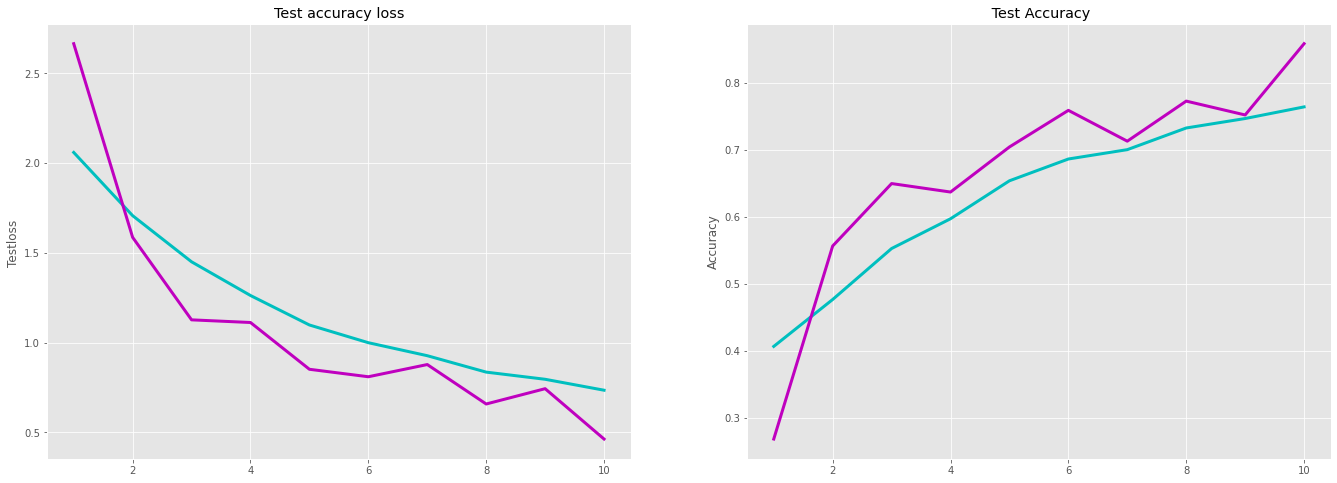

In [250]:
fig, axs = plt.subplots(1, 2, figsize=(23, 8))
ax = axs.ravel()
plt.subplot(1, 2, 1)
loss = History.history['loss']

loss_val = History.history['val_loss']
epochs = range(1, len(loss)+1)
ax[0].plot(epochs, loss, 'c', label='loss_train',linewidth=3)
ax[0].plot(epochs, loss_val, 'm', label='loss_val',linewidth=3)
ax[0].set_title('Test accuracy loss')
ax[0].set_ylabel('Testloss ')

Test_accuracy = History.history['accuracy']
Test_accuracy_val = History.history['val_accuracy']
ax[1].plot(epochs, Test_accuracy, 'c', label='accuracy_train',linewidth=3)
ax[1].plot(epochs, Test_accuracy_val, 'm', label='accuracy_val',linewidth=3)
ax[1].set_title(' Test Accuracy')

ax[1].set_ylabel('Accuracy')

plt.show()

In [140]:
Traffic_Y_train=Traffic_train['ClassId'].values
Traffic_Y_test=Traffic_test['ClassId'].values

Traffic_X_train=Traffic_train.drop(["ClassId"],axis=1).values
Traffic_X_test=Traffic_train.drop(["ClassId"],axis=1).values

print("Traffic X train values",Traffic_X_train.shape)
print("Traffic X test values",Traffic_X_test.shape)


#Sign_train = Traffic_X_train.reshape(-1,28,28,1)
#Sign_test = Traffic_X_test.reshape(-1,28,28,1)

#print("training pictures after resizing", Sign_train.shape)
#print("testing pictures after resizing",Sign_test.shape)
print("Y train labels",Traffic_Y_train.shape)
print("Y test  labels",Traffic_Y_test.shape)

Traffic X train values (27446, 1)
Traffic X test values (27446, 1)
Y train labels (27446,)
Y test  labels (12630,)


In [ ]:
Traffic= pd.read_csv('../input/gtsrb-german-traffic-sign/Test.csv',usecols=['Path','ClassId'])
Test_Data.head()

In [160]:
Traffic_test=pd.read_csv(r'C:\Users\user\Downloads\Traffic_Sign_Data\Test.csv',usecols=['Path','ClassId'])
Traffic_test.head()

,ClassId,Path
0,16,Test/00000.png
1,1,Test/00001.png
2,38,Test/00002.png
3,33,Test/00003.png
4,11,Test/00004.png


In [161]:
Traffic_test.shape

(12630, 2)

In [165]:
labels=pd.read_csv(r'C:\Users\user\Downloads\Traffic_Sign_Data\labels.csv')
path= 'C:/Users/user/Downloads/Trf_sign2'

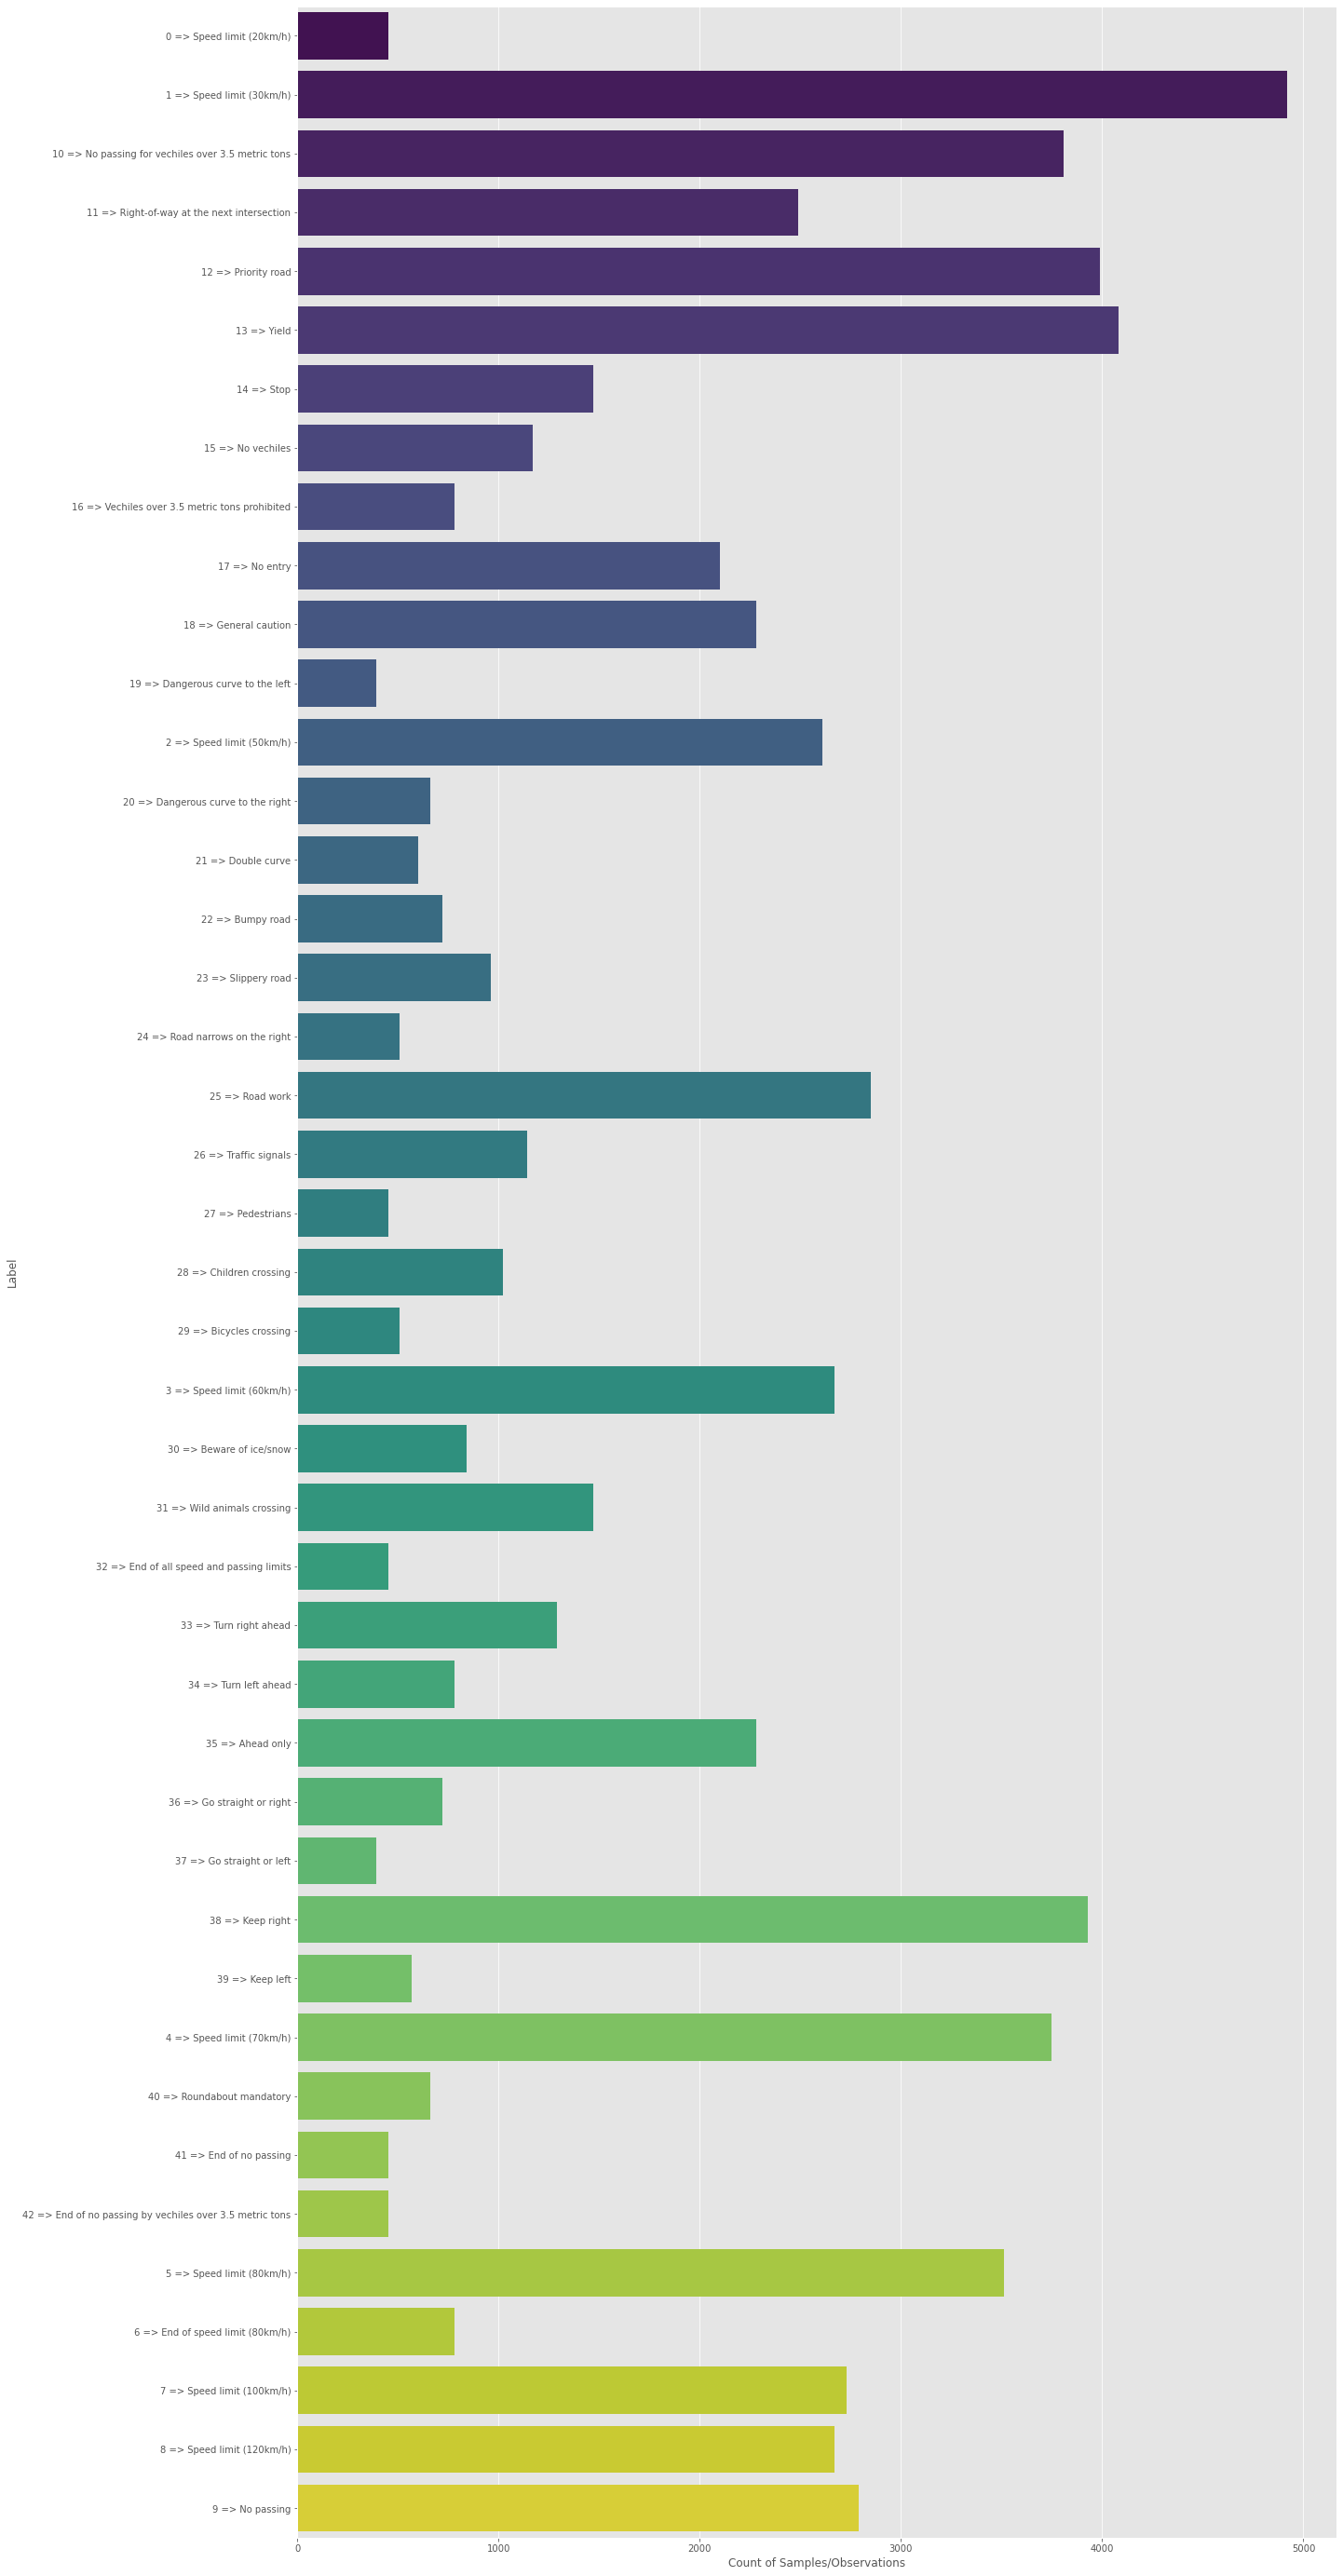

In [251]:
value = dict()
class_labels = dict()
for dirs in os.listdir(path + '/myData'):
    count = len(os.listdir(path+'/myData/'+dirs))
    value[dirs+' => '+labels[labels.ClassId == int(dirs)].values[0][1]] = count
    class_labels[int(dirs)] = labels[labels.ClassId == int(dirs)].values[0][1]

plt.figure(figsize = (20, 50))
sns.barplot(y = list(value.keys()), x = list(value.values()), palette = 'viridis')
plt.ylabel('Label')
plt.xlabel('Count of Samples/Observations');

In [187]:
picture_rows, picture_cols = 32, 32
# The images are RGB.
picture_channels = 3
nb_classes = len(class_labels.keys())

datagen = ImageDataGenerator()
data = datagen.flow_from_directory('C:/Users/user/Downloads/Trf_sign2/myData',
                                    target_size=(32, 32),
                                    batch_size=73139,
                                    class_mode='categorical',
                                    shuffle=True )

Found 73139 images belonging to 43 classes.


In [188]:
X_data , y_data = data.next()

In [189]:
print(f"Data Shape   :{X_data.shape}\nLabels shape :{y_data.shape}")

Data Shape   :(73139, 32, 32, 3)
Labels shape :(73139, 43)


In [191]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.20, random_state=11)

In [192]:
print("Train Shape: {}\nTest Shape : {}".format(X_train.shape, X_test.shape))

Train Shape: (58511, 32, 32, 3)
Test Shape : (14628, 32, 32, 3)


In [209]:
#ResNet
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, BatchNormalization, Dropout
resnet_check = ResNet50(weights= None, include_top=False, input_shape= (picture_rows,picture_cols,picture_channels))
x = resnet_check.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
predictions = Dense(nb_classes, activation= 'softmax')(x)
resnet_model = Model(inputs = resnet_check.input, outputs = predictions)
resnet_model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_7[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1_conv[0][0]']             
                                                                                            

In [210]:
resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [213]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger
resnet_model_check = ModelCheckpoint('best_model.h5', monitor='val_accuracy', verbose=0, save_best_only=True, mode='max')

resnet_early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=5, verbose=0, mode='max', restore_best_weights=True)

resnet_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

resnet_logger = CSVLogger('train_log.csv', separator=',')

In [222]:
n_epochs = 5
resnet_history =  resnet_model.fit(X_train, y_train,  batch_size = 128, epochs = n_epochs, verbose = 1, 
              validation_data = (X_test, y_test), callbacks = [resnet_model_check, resnet_early, resnet_lr, resnet_logger])

Epoch 1/5
458/458 [==============================] - ETA: 0s - loss: 2.2238 - accuracy: 0.4289 

C:\Users\user\anaconda3\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


458/458 [==============================] - 5211s 11s/step - loss: 2.2238 - accuracy: 0.4289 - val_loss: 1.8261 - val_accuracy: 0.4777 - lr: 0.0010
Epoch 2/5
458/458 [==============================] - 5498s 12s/step - loss: 0.4993 - accuracy: 0.8564 - val_loss: 0.3524 - val_accuracy: 0.8876 - lr: 0.0010
Epoch 3/5
458/458 [==============================] - 4519s 10s/step - loss: 0.1649 - accuracy: 0.9512 - val_loss: 0.0990 - val_accuracy: 0.9703 - lr: 0.0010
Epoch 4/5
458/458 [==============================] - 22373s 49s/step - loss: 0.2601 - accuracy: 0.9346 - val_loss: 4.7429 - val_accuracy: 0.3273 - lr: 0.0010
Epoch 5/5
458/458 [==============================] - 3708s 8s/step - loss: 0.2416 - accuracy: 0.9301 - val_loss: 0.1988 - val_accuracy: 0.9421 - lr: 0.0010


In [223]:
loss, acc = resnet_model.evaluate(X_test, y_test)
print('Accuracy: ', acc, '\nLoss    : ', loss)

458/458 [==============================] - 61s 134ms/step - loss: 0.1988 - accuracy: 0.9421
Accuracy:  0.9420973658561707 
Loss    :  0.19879356026649475


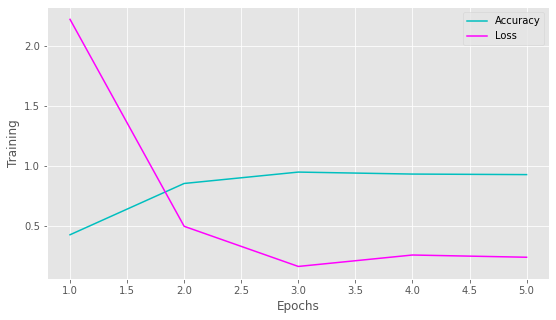

In [265]:
resnet_loss_val = len(list(resnet_history.history['loss']))
plt.figure(figsize=(9, 5))
sns.lineplot(x = range(1, 1+resnet_loss_val), y = resnet_history.history['accuracy'],color='c', label = 'Accuracy')
sns.lineplot(x = range(1, 1+resnet_loss_val), y = resnet_history.history['loss'], color='magenta',label = 'Loss')
plt.xlabel('Epochs')
plt.ylabel('Training')
plt.legend();

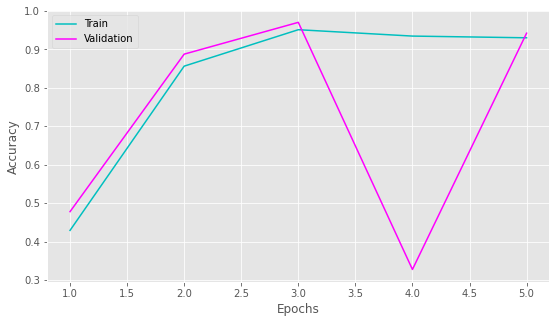

In [266]:
plt.figure(figsize=(9, 5))
sns.lineplot(x = range(1, 1+resnet_loss_val), y = resnet_history.history['accuracy'], color='c',label = 'Train')
sns.lineplot(x = range(1, 1+resnet_loss_val), y = resnet_history.history['val_accuracy'],color='magenta', label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend();

In [336]:
Correct_pred=Traffic_test.loc[[38,73,92,96,152,186,262,267,330],]
Correct_pred

,ClassId,Path
38,16,Test/00038.png
73,34,Test/00073.png
92,2,Test/00092.png
96,3,Test/00096.png
152,11,Test/00152.png
186,18,Test/00186.png
262,18,Test/00262.png
267,25,Test/00267.png
330,4,Test/00330.png


In [337]:
Correct_pred=Correct_pred.reset_index(drop=True)
Correct_pred.head()

,ClassId,Path
0,16,Test/00038.png
1,34,Test/00073.png
2,2,Test/00092.png
3,3,Test/00096.png
4,11,Test/00152.png


In [358]:
Test_gen1=ImageDataGenerator(rescale=1./255)

Test_generator1=Test_gen1.flow_from_dataframe(Traffic_test,
                                            'C:/Users/user/Downloads/Traffic_Sign_Data',
                                             x_col='Path',
                                              y_col=None,
                                              target_size=(120,120),
                                              batch_size=15,
                                              class_mode=None)

Found 12630 validated image filenames.


In [359]:
predict=model.predict(Test_generator1)
predict

array([[0.02328643, 0.02275975, 0.02380775, ..., 0.0227052 , 0.02375819,
        0.02263656],
       [0.02322956, 0.02263469, 0.0240089 , ..., 0.02244457, 0.02399869,
        0.02234491],
       [0.02323445, 0.02297537, 0.02361746, ..., 0.02292178, 0.02350531,
        0.02291638],
       ...,
       [0.02311876, 0.02274368, 0.02391831, ..., 0.02262371, 0.02380351,
        0.02256835],
       [0.02320214, 0.02269908, 0.02397868, ..., 0.02261422, 0.02382538,
        0.02260135],
       [0.02322949, 0.02242704, 0.02415688, ..., 0.02229533, 0.02412972,
        0.02215886]], dtype=float32)

In [367]:
# read in the Test.csv file
data_path1='C:/Users/user/Downloads/Traffic_Sign_Data'
test_data = pd.read_csv(os.path.join(data_path1, 'Test.csv'))
test_data.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


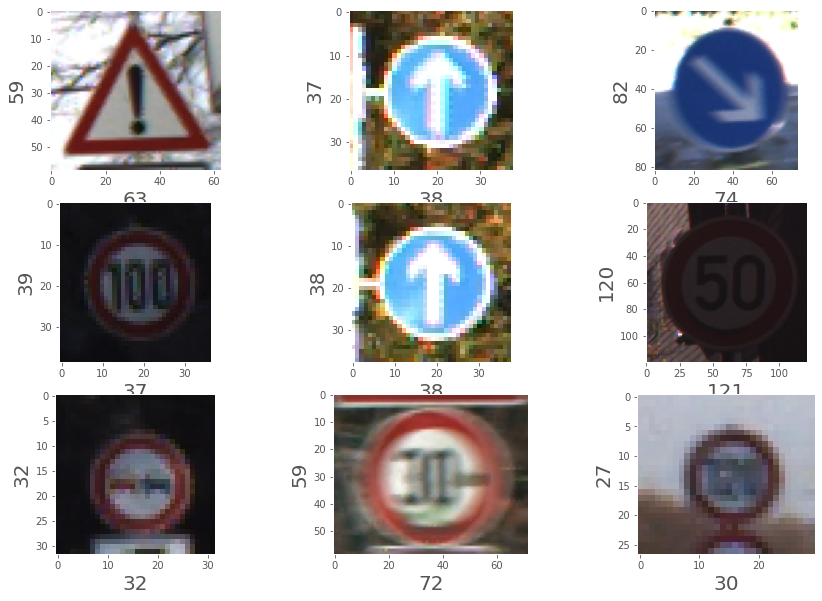

In [386]:
import random
from matplotlib.image import imread
final_test = pd.read_csv(data_path1+ '/Test.csv')
imgs = final_test["Path"].values

plt.figure(figsize=(15,10))

for i in range(1,10):
    plt.subplot(3,3,i)
    random_img_path = data_path1 + '/' + random.choice(imgs)
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)
    plt.grid(b=None)
    plt.xlabel(rand_img.shape[1], fontsize = 20)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 20)#height of image